Reading D:\FY2025\Fukuyama\work place\preprocessed_data\sub-010002_EC.fdt
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
Loading data for 238 events and 501 original time points ...
0 bad epochs dropped
NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_41104\3532650949.py:6: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
C:\Users\sFukuyama\AppData\Local\Temp\7\ipykernel_41104\3532650949.py:6: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


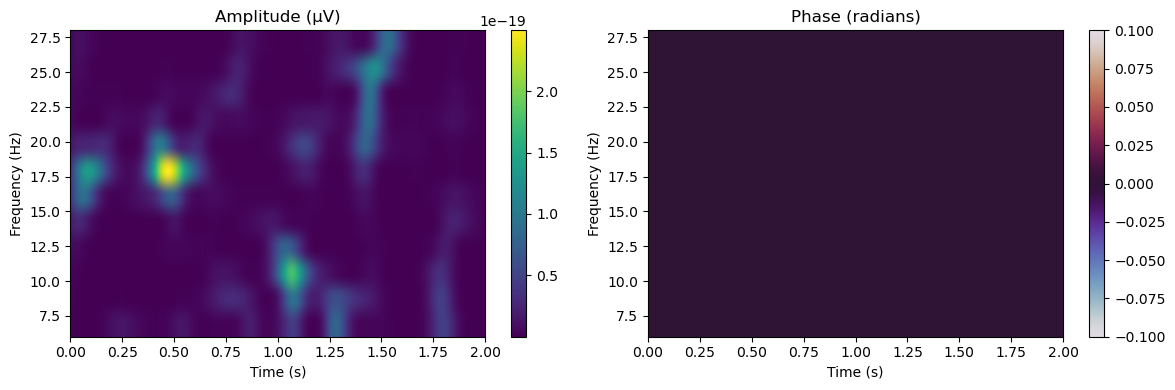

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# 1. Raw EEGデータ読み込み
raw = mne.io.read_raw_eeglab('D:\\FY2025\\Fukuyama\\work place\\preprocessed_data\\sub-010002_EC.set')
#raw.crop(tmax=60)  # 最初の60秒
#raw.pick_types(eeg=True)  # EEGのみ

# 2. 疑似イベント（2秒ごと）
events = mne.make_fixed_length_events(raw, id=1, duration=2.0)

# 3. エポック作成（2秒長）
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=2.0,
                    baseline=None, preload=True)

# 4. Morlet wavelet 変換
freqs = np.arange(6, 30, 2)  # 6〜28Hz
n_cycles = freqs / 2         # 各周波数に応じた波形長
power = mne.time_frequency.tfr_morlet(
    epochs, freqs=freqs, n_cycles=n_cycles,
    use_fft=True, return_itc=False, average=False
)

# 5. 振幅と位相の抽出
complex_data = power.data  # shape: (n_epochs, n_channels, n_freqs, n_times)
amplitude_data = np.abs(complex_data) ** 2   # 振幅（大きさ）
phase_data = np.angle(complex_data)         # 位相（−π〜π）
#phase_data = np.abs(phase_data) ** 2

# 6. 可視化：1エポック・1チャネル目（例）
epoch_i = 5
ch_i = 5

# 振幅
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(amplitude_data[epoch_i, ch_i], aspect='auto', origin='lower',
           extent=[0, 2.0, freqs[0], freqs[-1]], cmap='viridis')
plt.title("Amplitude (μV)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()

# 位相
plt.subplot(1, 2, 2)
plt.imshow(phase_data[epoch_i, ch_i], aspect='auto', origin='lower',
           extent=[0, 2.0, freqs[0], freqs[-1]], cmap='twilight')
plt.title("Phase (radians)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()

plt.tight_layout()
plt.show()


In [3]:
print(events)

[[    0     0     1]
 [  500     0     1]
 [ 1000     0     1]
 [ 1500     0     1]
 [ 2000     0     1]
 [ 2500     0     1]
 [ 3000     0     1]
 [ 3500     0     1]
 [ 4000     0     1]
 [ 4500     0     1]
 [ 5000     0     1]
 [ 5500     0     1]
 [ 6000     0     1]
 [ 6500     0     1]
 [ 7000     0     1]
 [ 7500     0     1]
 [ 8000     0     1]
 [ 8500     0     1]
 [ 9000     0     1]
 [ 9500     0     1]
 [10000     0     1]
 [10500     0     1]
 [11000     0     1]
 [11500     0     1]
 [12000     0     1]
 [12500     0     1]
 [13000     0     1]
 [13500     0     1]
 [14000     0     1]
 [14500     0     1]]
